# Importar librerias y Data set

In [86]:
# Importamos las librerías:
import matplotlib.pyplot as plt
plt.style.use('classic')
# Línea necesaria para que Matplotlib muestre por defecto los gráficos en nuestro Notebook:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime

In [51]:
movimientos="G:\Mi unidad\CARME\Trabajos\clean_data\movimientos_clean.csv"
df = pd.read_csv(movimientos, sep=",", skiprows=0)
promociones="G:\Mi unidad\CARME\Trabajos\clean_data\promociones_clean.csv"
df_promociones = pd.read_csv(promociones, sep=",", skiprows=0)
locales="G:\Mi unidad\CARME\Trabajos\clean_data\locales_clean.csv"
df_locales = pd.read_csv(path, sep=",", skiprows=0)
productos="G:\Mi unidad\CARME\Trabajos\clean_data\prov_prod_clean.csv"
df_productos = pd.read_csv(productos, sep=",", skiprows=0)

# Dataset Movimientos

In [69]:
df.head(20)

,idb,id_producto,fecha_trans,stock_unidades,venta_unidades,precio_unitario,cd_abast,is_prod_rol_local
0,242,228217,2016-07-15,24.0,0.0,13.63,0,1
1,242,228217,2016-07-16,24.0,0.0,13.63,0,1
2,242,228217,2016-07-17,24.0,0.0,13.63,0,1
3,242,228217,2016-07-18,24.0,0.0,13.63,0,1
4,242,228217,2016-07-19,24.0,0.0,13.63,0,1
5,242,228217,2016-07-20,24.0,0.0,13.63,0,1
6,242,228217,2016-07-21,24.0,0.0,13.63,0,1
7,242,228217,2016-07-22,24.0,0.0,13.63,0,1
8,242,228217,2016-07-23,24.0,0.0,13.63,0,1
9,242,228217,2016-07-24,24.0,0.0,13.63,0,1


In [53]:
df.describe()

,idb,id_producto,stock_unidades,venta_unidades,precio_unitario,cd_abast,is_prod_rol_local
count,8.347817e+06,8.347817e+06,8.347817e+06,8.347817e+06,8.347817e+06,8.347817e+06,8.347817e+06
mean,6.988555e+03,3.785489e+05,2.065585e+01,3.133696e-01,6.426050e+01,5.435286e+03,9.609797e-01
std,3.300353e+03,9.159373e+04,1.488001e+02,8.950359e-01,6.582745e+01,4.533729e+03,1.936432e-01
min,2.420000e+02,1.641460e+05,-5.420000e+02,-4.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.208000e+03,2.929450e+05,6.000000e+00,0.000000e+00,2.251000e+01,0.000000e+00,1.000000e+00
50%,9.026000e+03,4.152680e+05,1.000000e+01,0.000000e+00,3.823000e+01,9.217000e+03,1.000000e+00
75%,9.159000e+03,4.583930e+05,1.700000e+01,0.000000e+00,7.673000e+01,9.217000e+03,1.000000e+00
max,9.977000e+03,5.113260e+05,1.621800e+04,6.120000e+02,4.238100e+02,9.217000e+03,1.000000e+00


Hay precios unitarios 0, eso no deberia ser asi, aunque puede estar relacionado con alguna promoción, a ver cuando se cruce con las otras tablas. Se observa también el 75% de los datos unidades_venta 0

In [54]:
df.nunique(axis=0)

idb                   142
id_producto            92
fecha_trans          1092
stock_unidades       4372
venta_unidades         78
precio_unitario       283
cd_abast                2
is_prod_rol_local       2
dtype: int64

Se observa que hay 92 productos que son diferentes y 142 locales diferentes y 1092 dias.
Entre las fechas 2016-07-15 y 2019-7-14 hay 1094 dias así que ha habido 2 festivos, pero los fines de semana como norma general hay registros
También dos tipos unicos de cd_abast y is_prod_rol_local

In [55]:
df.venta_unidades.value_counts()

 0.0     6722807
 1.0     1069800
 2.0      340204
 3.0      115684
 4.0       50343
          ...   
 79.0          1
 39.0          1
-12.0          1
-7.0           1
 53.0          1
Name: venta_unidades, Length: 78, dtype: int64

Se observa como  6,7 millones de registros el valor de ventas es 0, habiamos visto antes que habia un 75% de datos que eran 0, entendemos que registran cada dia todos los productos hayan vendido o no

In [56]:
df.id_producto.value_counts()

240911    151161
429883    150290
249486    150282
342686    147368
386296    145433
           ...  
511324     19747
511326     19493
370269     18975
511325     17482
497936      1521
Name: id_producto, Length: 92, dtype: int64

Quiero ver si hay productos que no se venden nunca, filtro el data set por valores cero en ventas a ver cuantos productos quedan tras el filtro

In [298]:
df_cleaned = df.groupby('id_producto', as_index= False)['venta_unidades'].sum()
df_cleaned=df_cleaned[df_cleaned['venta_unidades']==0]
print(df_cleaned)

    id_producto  venta_unidades
83       497936             0.0


Por otro lado miramos cuantos productos están descatalogados ?¿ a confirmar interpretación

In [59]:
df.is_prod_rol_local.value_counts()

1    8022083
0     325734
Name: is_prod_rol_local, dtype: int64

Habría 325734 registros de productos descatalogados. Miramos cuantos productos serían

In [308]:
df_cleaned = df[df['is_prod_rol_local'].between(1,1)]

In [309]:
df_cleaned.is_prod_rol_local.value_counts()

1    8022083
Name: is_prod_rol_local, dtype: int64

In [310]:
df_cleaned.id_producto.nunique()

92

Habría 325734 registros de productos descatalogados que pertenecen a 92 productos--> no entiendo la variable entonces

Se analiza si hay registros todos los días del año:

In [275]:
df.fecha_trans=pd.to_datetime(df.fecha_trans,format='%Y-%m-%d', errors='coerce')
#df_fecha = df.set_index(['fecha_trans'])
df_fecha_2016=df.query("fecha_trans >= '2016-01-01' and fecha_trans <='2016-12-31'")
df_fecha_2017=df.query("fecha_trans >= '2017-01-01' and fecha_trans <='2017-12-31'")
df_fecha_2018=df.query("fecha_trans >= '2018-01-01' and fecha_trans <='2018-12-31'")
df_fecha_2019=df.query("fecha_trans >= '2019-01-01' and fecha_trans <='2019-12-31'")

In [277]:
print('2016=',df_fecha_2016.fecha_trans.nunique(),",", '2017=',df_fecha_2017.fecha_trans.nunique(),",", '2018=', df_fecha_2018.fecha_trans.nunique(),",", '2019=', df_fecha_2019.fecha_trans.nunique())

2016= 170 , 2017= 363 , 2018= 364 , 2019= 195


Vamos a mirar 1 semana concreta para ver si los fines de semana tambien hay ventas

(array([17014., 17015., 17016., 17017., 17018., 17019., 17020., 17021.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

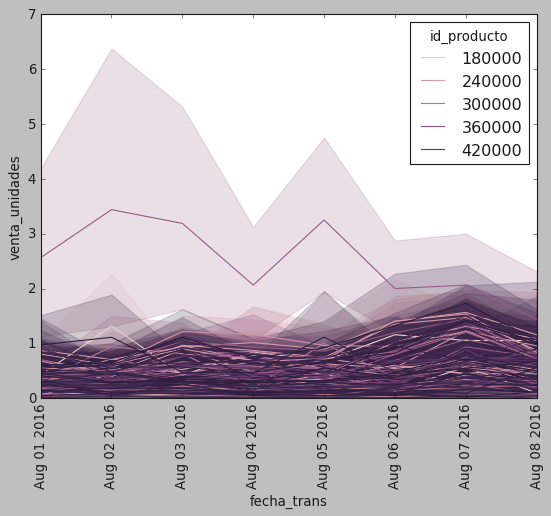

In [315]:
df_fecha_Agosto_2016=df.query("fecha_trans >= '2016-08-01' and fecha_trans <='2016-08-08'")
#df_fecha_Agosto_2016.fecha_trans= pd.to_datetime(df_pproducto.fecha_trans)
#plt.figure(figsize=(10, 3))
sns.lineplot(data=df_fecha_Agosto_2016, x='fecha_trans', y='venta_unidades', hue='id_producto')
plt.xticks(rotation= 90)

Sí hay ventas los fines de semana, de hecho parece que hasta suben siendo el 6 y 7 agosto un fin de semana

Antes hemos analizado las ventas 0 pero no los picos. Vamos a ver qué productos se venden más, sin tener en cuenta la fecha

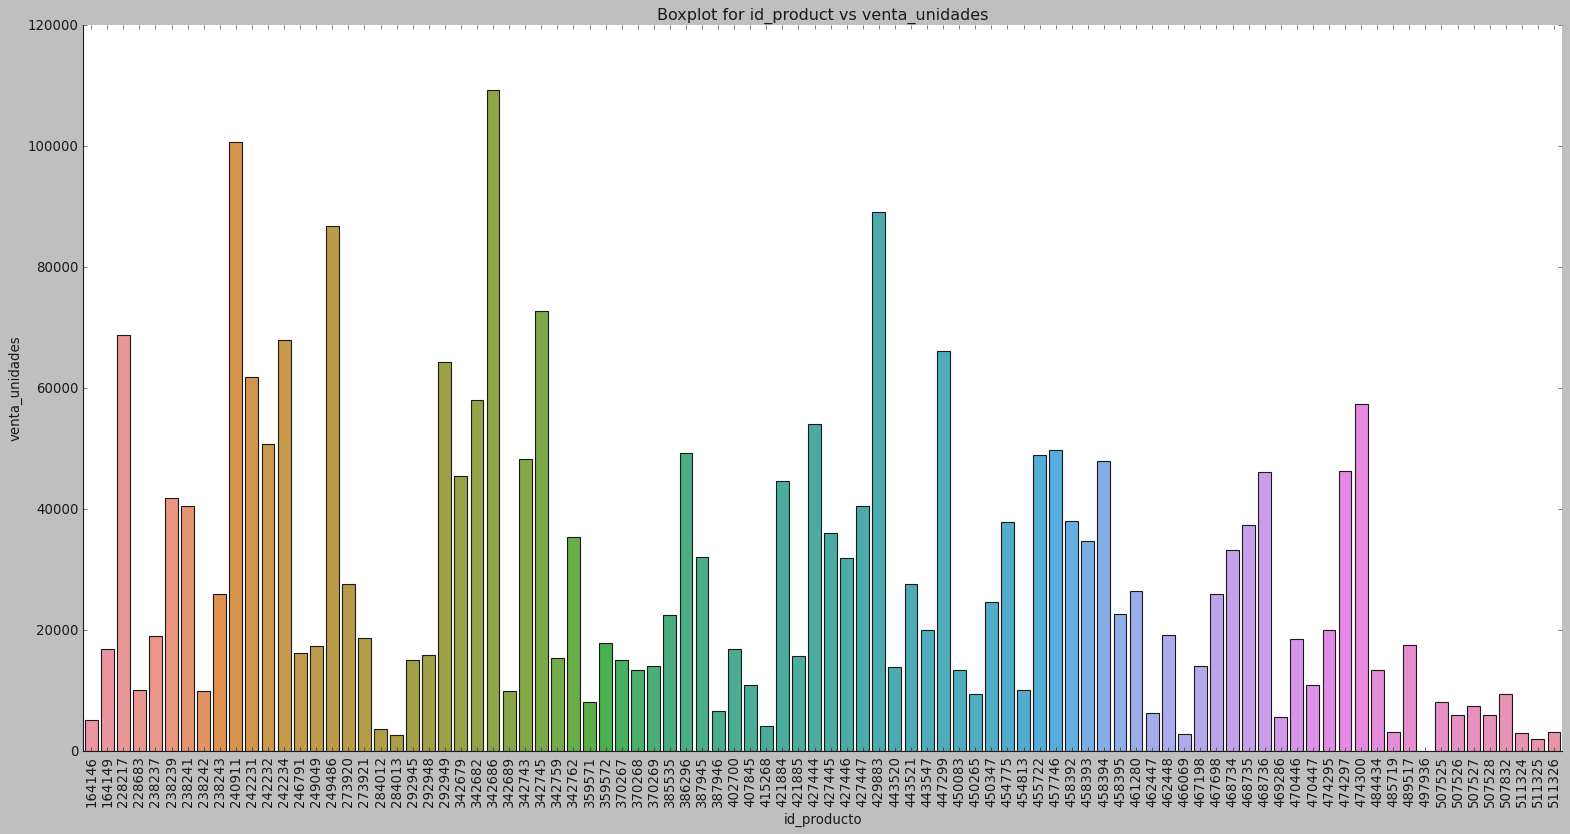

In [330]:
df_pproducto=df.groupby(['id_producto'],as_index=False)['venta_unidades'].sum()
sns.catplot(x="id_producto", y="venta_unidades", data=df_pproducto, kind= "bar" , height=10, aspect=2)
plt.title("Boxplot for id_product vs venta_unidades")
plt.xticks(rotation= 90)
plt.show()

Se obserban los productos más vendidos, si hacemos elcorte en 60k unidades serian los siguientes:

In [335]:
df_pproducto=df_pproducto.query("venta_unidades >= 60000")
print(df_pproducto)

    id_producto  venta_unidades
2        228217         68760.0
9        240911        100622.0
10       242231         61819.0
12       242234         67852.0
15       249486         86710.0
22       292949         64334.0
25       342686        109151.0
28       342745         72627.0
49       429883         89072.0
53       447299         66066.0


Aparecen los 10 productos más vendidos en todo el periodo. Se podria analizar anualmente si es así

A continuación analizamos la suma de las ventas en el tiempo por producto. El formato fecha me da problemas así que lo convierto con la libreria datetime.

In [337]:
df_pproducto= df.groupby(['fecha_trans','id_producto'], as_index=False)['venta_unidades'].sum()
df_pproducto.fecha_trans= pd.to_datetime(df_pproducto.fecha_trans)

In [338]:
df_pproducto.head()

,fecha_trans,id_producto,venta_unidades
0,2016-07-15,164146,8.0
1,2016-07-15,164149,5.0
2,2016-07-15,228217,9.0
3,2016-07-15,228683,0.0
4,2016-07-15,238237,14.0


<AxesSubplot:xlabel='fecha_trans', ylabel='venta_unidades'>

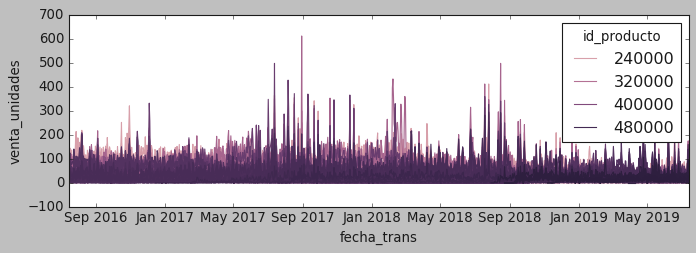

In [279]:
plt.figure(figsize=(10, 3))
sns.lineplot(data=df_pproducto, x='fecha_trans', y='venta_unidades', hue='id_producto')

In [199]:
df_pproducto.describe()

,id_producto,venta_unidades
count,91389.000000,91389.000000
mean,378752.941842,28.624364
std,92498.010823,30.741050
min,164146.000000,-3.000000
25%,292945.000000,8.000000
50%,407845.000000,20.000000
75%,458394.000000,39.000000
max,511326.000000,612.000000


(array([17045., 17167., 17287., 17410., 17532., 17652., 17775., 17897.,
        18017.]),
 [Text(17045.0, 0, 'Sep 2016'),
  Text(17167.0, 0, 'Jan 2017'),
  Text(17287.0, 0, 'May 2017'),
  Text(17410.0, 0, 'Sep 2017'),
  Text(17532.0, 0, 'Jan 2018'),
  Text(17652.0, 0, 'May 2018'),
  Text(17775.0, 0, 'Sep 2018'),
  Text(17897.0, 0, 'Jan 2019'),
  Text(18017.0, 0, 'May 2019')])

<Figure size 800x160 with 0 Axes>

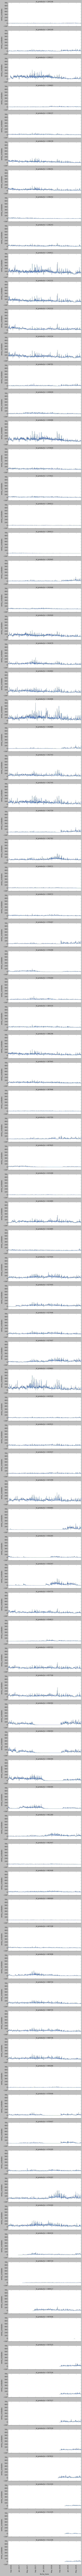

In [198]:
plt.figure(figsize=(10, 2))
#sns.lineplot(data=df_pproducto, x='fecha_trans', y='venta_unidades', hue='id_producto')
sns.relplot(data=df_pproducto,  kind="line", x="fecha_trans", y="venta_unidades", row="id_producto", height=3, aspect=3)
plt.xticks(rotation=90)

Se obserba como hay productos que se han empezado a vender más tarde que otros y no se tienen datos en toda la serie temporal

## Conclusiones preliminares de Movimientos

1. Se observa como  6,7 millones de registros el valor de ventas es 0, habiamos visto antes que habia un 75% de datos que eran 0, entendemos que registran cada dia todos los productos hayan vendido o no.
2. Hay precios unitarios 0, eso no deberia ser asi, aunque puede estar relacionado con alguna promoción, a evaluar cuando se cruce con las otras tablas
3. Hay un producto (497936) que no tiene ninguna venta, yo propondria eliminarlo del data set si es que no tiene ninguna promoción asociada, pues podria ser que no se venda ni con promociones.
4. Habría 325734 registros de productos descatalogados que pertenecen a 92 productos
4. Se observa que hay 92 productos que son diferentes y 142 locales diferentes
5. Hay movimientos desde 2016-07-15 y 2019-017-14, eso son 1095 días y hay 1092 dias en los registros únicamente,
así que ha habido 3 días sin registros. El año 2016 es bisiesto pero no afecta y el resto no lo són.
 Se registran movimientos en el número de dias siguientes 2016= 170 , 2017= 363 , 2018= 364 , 2019= 195
 Según calendario serían 2016= 170 , 2017= 365 , 2018= 365 , 2019= 195.
 Se asume que los días faltantes debieron ser caidas del sistema aunque podría ser algún festivo concreto (no lo he mirado).

Pero los fines de semana como norma general hay registros en el data set y se ha comprobado que también hay ventas.

6. Se obserba como hay productos que se han empezado a vender más tarde que otros y no se tienen datos en toda la serie temporal

## Dudas sobre dataset Movimientos
 a) No entiendo bien que es al variable cd_abast, tampoco que haya valores 0, son el 25% de los datos. Creo que no seria relevante para las preguntas a responder
 b) No entiendo bien qué es "Si sigue el producto en Rol en el local" significa que si es que no entonces está descatalogado?

# Dataset Promociones

In [64]:
df_promociones.head(20)

,idb,id_producto,fecha_desde,fecha_hasta,ventas_estimadas_und,nro_prom,fecha_trans,porcentaje_dcto,duracion_promo
0,242,228217,2016-10-23,2016-10-30,0.98,436830,2016-10-05,7.0,7.0
1,242,228217,2016-10-23,2016-10-30,0.98,436830,2016-10-06,7.0,7.0
2,242,228217,2016-10-23,2016-10-30,0.98,436830,2016-10-07,7.0,7.0
3,242,228217,2016-10-23,2016-10-30,0.98,436830,2016-10-08,7.0,7.0
4,242,228217,2016-10-23,2016-10-30,0.98,436830,2016-10-09,7.0,7.0
5,242,228217,2016-10-23,2016-10-30,0.98,436830,2016-10-10,7.0,7.0
6,242,228217,2016-10-23,2016-10-30,0.98,436830,2016-10-11,7.0,7.0
7,242,228217,2016-10-23,2016-10-30,0.98,436830,2016-10-12,7.0,7.0
8,242,228217,2016-10-23,2016-10-30,0.98,436830,2016-10-13,7.0,7.0
9,242,228217,2016-10-23,2016-10-30,0.98,436830,2016-10-14,7.0,7.0


In [85]:
df_promociones.dtypes

idb                       int64
id_producto               int64
fecha_desde              object
fecha_hasta              object
ventas_estimadas_und    float64
nro_prom                  int64
fecha_trans              object
porcentaje_dcto         float64
duracion_promo          float64
dtype: object

In [65]:
df_promociones.describe()

,idb,id_producto,ventas_estimadas_und,nro_prom,porcentaje_dcto,duracion_promo
count,285253.000000,285253.000000,285253.000000,285253.000000,285253.000000,285253.000000
mean,7065.578963,388393.367197,24.622701,471275.031435,8.394103,8.394103
std,3169.254446,83906.420820,30.314661,37596.939924,2.893570,2.893570
min,242.000000,164146.000000,0.000000,425196.000000,3.000000,3.000000
25%,5207.000000,342682.000000,6.000000,436830.000000,7.000000,7.000000
50%,9026.000000,427445.000000,12.520000,456807.000000,7.000000,7.000000
75%,9159.000000,458395.000000,30.440000,502702.000000,8.000000,8.000000
max,9977.000000,507528.000000,300.820000,541066.000000,18.000000,18.000000


Algo hay raro en las columnas de duración promoción y porcentaje_dcto

In [66]:
df_promociones.nunique()

idb                      138
id_producto               76
fecha_desde               75
fecha_hasta               69
ventas_estimadas_und    1952
nro_prom                 116
fecha_trans              719
porcentaje_dcto           13
duracion_promo            13
dtype: int64

De momento se obserban 76 productos y 138 locales, antes teniamos 92 y 142 respectivamente, significa que no todos los productos/locales tienen promociones asociadas hasta la fecha. Hay 116 promociones diferentes y 13 tipos de porcentajes


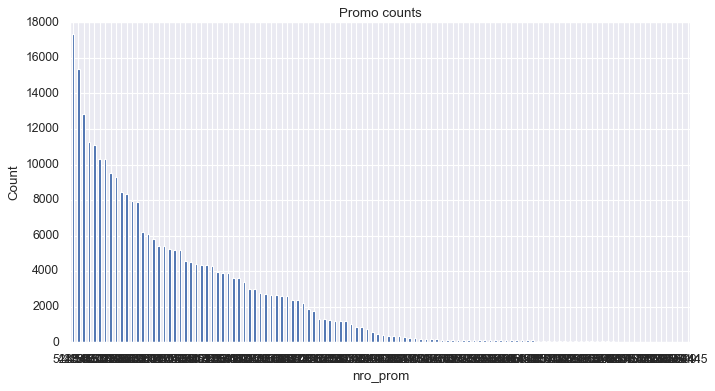

In [67]:
df_promociones.nro_prom.value_counts().plot(kind="bar")
plt.title("Promo counts")
plt.xlabel("nro_prom")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

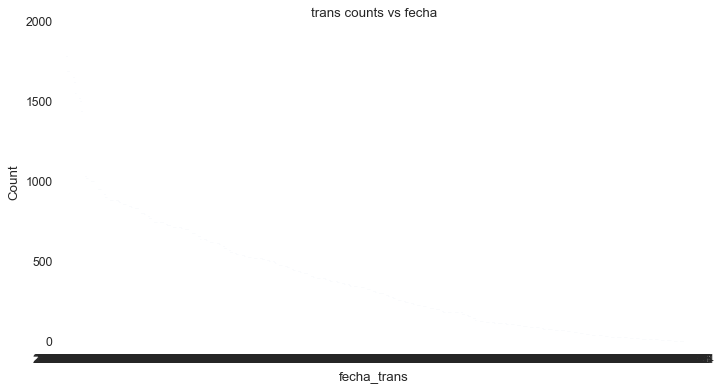

In [68]:
df_promociones.fecha_trans.value_counts().plot(kind="bar")
plt.title("trans counts vs fecha")
plt.xlabel("fecha_trans")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

## Dudas de dataset Promociones

a) ventas estimadas. Porque estimadas? es previo a la promoción? Tampoco entiendo valores inferiores a 1